In [3]:
words = open('names.txt', 'r').read().splitlines() #dataset

In [5]:
#realize, each name:
# emma : tells us:
# e is likely to be a starting char. m is likely to come after e, m is likely to come after em, a is likely to come after emm, and nothing is likely to come after emma
# in a bigram , we only look at 1 character back. meaning, after M, a is likely. (NOT EMM)



#BIGRAM IS ONLY 2 CHARACTERS at a time!

In [7]:
#explore what bigrams we have
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2) #character bigrams !

. e
e m
m m
m a
a .


In [8]:
#this above shows us the possible 2 character look backs, in which the <S> indicates Start, (so it can learn the next character is liekly to follow/or be the start)

In [9]:
#now create a hashmap kinda that stores the occurances of each bigram. this will help us see what bigrams are common and what likely follows what


b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)

        if not b.get(bigram):
            b[bigram] = 1
        else:
            b[bigram] += 1

In [10]:
b #statistics accorss the entire dataset

{('.', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '.'): 6640,
 ('.', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('.', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('.', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('.', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('.', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '.'): 3983,
 ('.', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('.', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '.'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '.'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,
 ('g', 'a'): 330,
 ('a',

In [11]:
sorted(b.items(), key = lambda kv: -kv[1]) #sorted version . we use weird sorting system cuz we want it sorted by value (occurances) not by key . and we want it referse (max to min) so we use the lambda.. 

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [14]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos =  {i:s for s, i in stoi.items()}
stoi #map to integers, all characters in alphabet

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [15]:
import torch

N = torch.zeros((27,27), dtype = torch.int32) #28 by 28 because 26x26 for all character matrix, but we aso have start and end character so its +1

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 =  stoi[ch1] #get mapped integer value
        ix2 = stoi[ch2] #get the mapped integer value

        N[ix1, ix2] += 1 # update the tensor value array that was created above
    

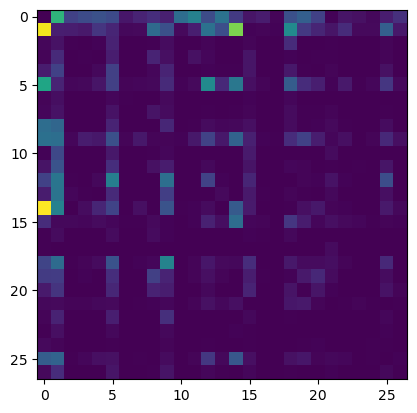

In [16]:
#visualize the data to see what characters come after each other i the matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [17]:
# convert to probabilities

p = N[0].float()
p = p/p.sum()
p #probabilities now of first letter and what itll be

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [18]:
#sample from the probability
g = torch.Generator().manual_seed(214783647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix

11

In [19]:
itos[ix]

'k'

In [20]:
#WOrking bigram model
P = (N+1).float() #this is to smooth the model so that everythignis SOMEWHAT viable with the +1, called model smoothing
P /= P.sum(1, keepdim=True)


g = torch.Generator().manual_seed(214783647)
for i in range(10):
    out = []
    ix = 0 #preceding character
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


kaa.
akyremilsandearvikyloria.
hte.
reckadevaiacadivi.
atayama.
a.
luloradan.
dror.
ancherwite.
drin.


In [22]:
# log(A*B*C) = log(a) + log(b) + log(c)

In [23]:
#loss function

log_likelihood = 0.0
n = 0


for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 =  stoi[ch1] 
        ix2 = stoi[ch2]
        prob =P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} : {logprob:.4f}')

print("LOG" + str(log_likelihood))
normalized_log_likelihood = -log_likelihood/n
print("NLL" + str(normalized_log_likelihood) )

.e: 0.0478 : -3.0410
em: 0.0377 : -3.2793
mm: 0.0253 : -3.6753
ma: 0.3885 : -0.9454
a.: 0.1958 : -1.6305
.o: 0.0123 : -4.3965
ol: 0.0779 : -2.5526
li: 0.1774 : -1.7293
iv: 0.0152 : -4.1845
vi: 0.3508 : -1.0476
ia: 0.1380 : -1.9807
a.: 0.1958 : -1.6305
.a: 0.1376 : -1.9835
av: 0.0246 : -3.7041
va: 0.2473 : -1.3971
a.: 0.1958 : -1.6305
LOGtensor(-38.8086)
NLLtensor(2.4255)


In [24]:
#neural network approach

# bigram neural network: inputs previous character --> neural net --> outputs next character

# tune the weights so the loss func is min
#loss func = min when neural net probabilities match the proabbiliies of next character matrix from training data


In [25]:
# create training set of bigrams (x,y)

xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        print(ch1, ch2)
        
        xs.append(ix1)
        ys.append(ix2)


xs = torch.tensor(xs)
ys = torch.tensor(ys)


. e
e m
m m
m a
a .


In [26]:
xs

tensor([ 0,  5, 13, 13,  1])

In [28]:
ys

tensor([ 5, 13, 13,  1,  0])

In [29]:
#when input is 0, the desired label is 5
#when input is 5, the output is 13
# so we want to train these probabilities

In [30]:
# neural net has many neurons. cant just feed in numbers like  3  or four,
# instead, we use one hot encoding, so to represent 3, [0,0,1,0,0,0]. create a vector .
# this is called one hot encoding, pytorch has this function


import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float() #we want as float for dtype, bc integers cant feed into nerual net, but floats an



In [31]:
xenc #x encoded with one hot encoding

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

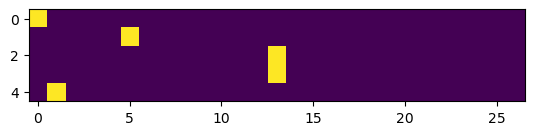

In [32]:
xenc.shape
plt.imshow(xenc) #appropriate bit turned on , everything else is 0. so we cn represent #s with the hot encoding

#these vectors can now feed into neural networks

In [33]:
W = torch.randn((27,27)) #initial weights of this neural
W

tensor([[ 7.3219e-01,  3.7561e-01, -3.8174e-01, -9.5553e-01,  6.8824e-01,
         -1.8303e+00, -2.5200e-01, -8.7940e-01, -2.7463e+00,  3.7544e-01,
          6.5735e-01,  1.0139e+00,  1.2862e+00, -1.6463e+00, -8.3016e-01,
          1.4160e+00,  7.8849e-01,  5.3243e-01, -6.7298e-01,  1.3519e-01,
          2.7716e-01,  8.5553e-01,  1.3513e+00, -2.0990e-01, -1.8809e+00,
         -9.0549e-01,  2.0849e-01],
        [ 6.5037e-01, -3.0484e-01, -4.0139e-01, -1.1657e+00, -4.7253e-01,
         -4.6859e-01,  6.3304e-01,  1.6870e+00,  1.4093e+00, -8.9210e-01,
         -5.5854e-01, -1.5302e-01, -1.3138e+00, -2.1365e+00, -1.4540e-01,
          7.8545e-01, -8.9415e-01, -4.5774e-01,  1.0399e+00, -3.5602e-01,
          1.5480e-01, -7.9083e-01, -5.9752e-01, -9.5948e-01,  3.7198e-01,
         -2.0670e-01,  1.6346e+00],
        [ 9.6889e-01, -7.6960e-02, -8.9024e-01, -4.0461e-01,  2.8209e-01,
         -5.7653e-01, -1.3023e+00,  2.3134e+00, -1.2890e+00,  6.4186e-01,
         -1.7286e-01, -1.8248e+00, -6.28

In [35]:
#now we multiply weights by the original x values to get preditcted y values.

xenc @ W #matrix multiplication 

# [5,27] (5 inputs) @ [27,27] (weights) = 1 output per input = [5, 27]

tensor([[ 0.7322,  0.3756, -0.3817, -0.9555,  0.6882, -1.8303, -0.2520, -0.8794,
         -2.7463,  0.3754,  0.6574,  1.0139,  1.2862, -1.6463, -0.8302,  1.4160,
          0.7885,  0.5324, -0.6730,  0.1352,  0.2772,  0.8555,  1.3513, -0.2099,
         -1.8809, -0.9055,  0.2085],
        [ 1.7370, -0.1911,  1.2508,  1.0737,  0.4665, -1.3383, -2.5719, -0.9789,
          0.3542, -0.0248,  0.2218, -1.2045,  0.0503,  1.0081,  0.1477, -0.3015,
          0.0468, -1.6384,  0.9280,  0.1816, -0.0312, -0.3703,  1.3389,  1.0446,
          0.9955,  0.6155,  1.1908],
        [-0.6676, -0.9053, -0.6001,  1.0959,  0.6581,  3.1610,  0.1172,  0.0396,
          0.0584,  0.8991, -0.8036,  1.0506, -1.4185, -0.5407,  0.3222,  1.5728,
          2.7658, -0.8067,  0.3988, -0.5376, -0.0906,  1.9543,  0.4797,  1.4560,
          2.1271,  0.4151, -0.6467],
        [-0.6676, -0.9053, -0.6001,  1.0959,  0.6581,  3.1610,  0.1172,  0.0396,
          0.0584,  0.8991, -0.8036,  1.0506, -1.4185, -0.5407,  0.3222,  1.5728

In [36]:
# convert to probabilities

logits = xenc @ W #log-counts
counts = logits.exp()

#softmax -> divides and normalizes to make them "probabilities" always sums to 1 and is 0-1
probs = counts/counts.sum(1, keepdims=True)
probs

tensor([[0.0544, 0.0381, 0.0179, 0.0101, 0.0521, 0.0042, 0.0203, 0.0109, 0.0017,
         0.0381, 0.0505, 0.0721, 0.0947, 0.0050, 0.0114, 0.1078, 0.0576, 0.0446,
         0.0134, 0.0300, 0.0345, 0.0616, 0.1011, 0.0212, 0.0040, 0.0106, 0.0322],
        [0.1235, 0.0180, 0.0759, 0.0636, 0.0347, 0.0057, 0.0017, 0.0082, 0.0310,
         0.0212, 0.0271, 0.0065, 0.0229, 0.0596, 0.0252, 0.0161, 0.0228, 0.0042,
         0.0550, 0.0261, 0.0211, 0.0150, 0.0829, 0.0618, 0.0588, 0.0402, 0.0715],
        [0.0058, 0.0046, 0.0062, 0.0337, 0.0218, 0.2659, 0.0127, 0.0117, 0.0119,
         0.0277, 0.0050, 0.0322, 0.0027, 0.0066, 0.0156, 0.0543, 0.1791, 0.0050,
         0.0168, 0.0066, 0.0103, 0.0796, 0.0182, 0.0483, 0.0946, 0.0171, 0.0059],
        [0.0058, 0.0046, 0.0062, 0.0337, 0.0218, 0.2659, 0.0127, 0.0117, 0.0119,
         0.0277, 0.0050, 0.0322, 0.0027, 0.0066, 0.0156, 0.0543, 0.1791, 0.0050,
         0.0168, 0.0066, 0.0103, 0.0796, 0.0182, 0.0483, 0.0946, 0.0171, 0.0059],
        [0.0531, 0.0204,